In [1]:
import string
import torch
import matplotlib.pyplot as plt

In [2]:
SPECIAL_CHAR = "<"

In [3]:
with open("data/names_usa.txt", "r") as f:
    names = f.read().split("\n")

In [4]:
name_to_int = {n: k for k, n in enumerate(names)}

In [5]:
chars = [SPECIAL_CHAR] + list(string.ascii_lowercase)
chars_to_int = {c: k for k, c in enumerate(chars)}

## Bigram count

In [6]:
bigram_cnt = torch.zeros((len(chars), len(chars)))
for n in map(lambda x: SPECIAL_CHAR + x + SPECIAL_CHAR, names):
    for s, e in zip(n, n[1:]):
        i, j = chars_to_int[s], chars_to_int[e]
        bigram_cnt[i, j] += 1

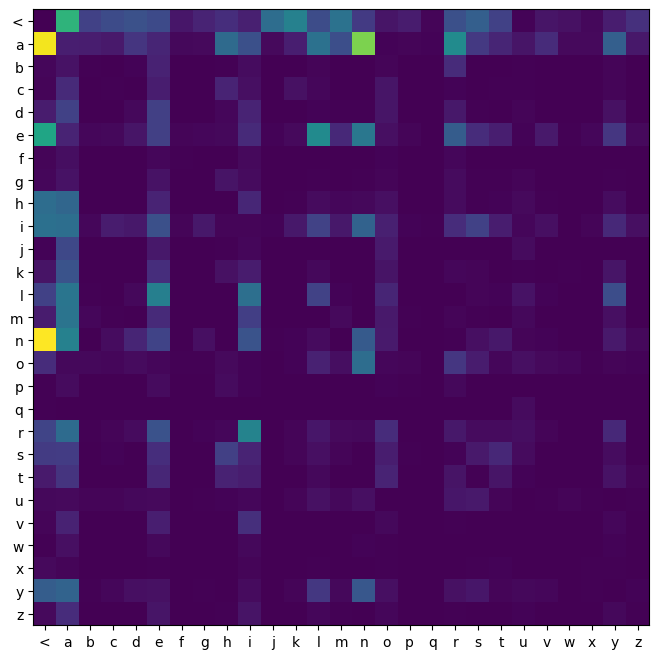

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(bigram_cnt)
ax.set_xticks(range(len(chars)))
ax.set_yticks(range(len(chars)))
ax.set_xticklabels(chars)
ax.set_yticklabels(chars)
plt.show()

In [8]:
bigram_norm = (bigram_cnt.T / torch.sum(bigram_cnt, dim=1)).T

## Bigram Generation

In [9]:
n_samples = 10
generator = torch.Generator().manual_seed(42)
output = []
for _ in range(n_samples):
    idx = 0
    new_name = chars[idx]
    while (idx != 0) | (len(new_name) == 1):
        idx = torch.multinomial(bigram_cnt[idx, :], num_samples=1, generator=generator).item()
        new_name += chars[idx]
    output.append(new_name[1:-1])
print(output)

['ya', 'syahavilin', 'dleekahmangonya', 'tryahe', 'chen', 'ena', 'da', 'amiiae', 'a', 'keles']


## Uniform Random Generation

In [10]:
n_samples = 10
generator = torch.Generator().manual_seed(42)
output = []
for _ in range(n_samples):
    idx = 0
    new_name = chars[idx]
    while (idx != 0) | (len(new_name) == 1):
        idx = torch.randint(high=len(chars)-1, size=(1, 1)).item()
        new_name += chars[idx]
    output.append(new_name[1:-1])
print(output)

['ebwk', 'qmpitpyydqiorqwc', 'axpkvgjsaxjtvbrkrgjltqtbcuyvtnsyxnlloeusniwxlcdjtwdqsvneollaagdyrywsmpixnuqetyc', 'mpgqyrbvkfwbbmhjfpfhyhbgoi', 'iulitjskxhtboacocya', 'kkirdsugtjsthiiuvq', 'ulbbbihcmqtilxejichsmxscpetnyfgntpelpeij', 'tiybwuodidcjbgjmsih', 'kqjcawfneyivlhmqkhewpgwegtvvuytpdnfwqrgop', 'ikijdylxebd']


## Optimization

In [11]:
X_tr = torch.tensor([chars_to_int[c] for c in "<" + "<".join(names)])
y_tr = X_tr[1:]
X_tr = torch.nn.functional.one_hot(X_tr).float()[:-1]

In [49]:
W = torch.rand((len(chars), len(chars)), requires_grad=True, generator=generator)

lr = 50
epochs = 200
for e in range(epochs):
    log_counts = X_tr @ W
    counts = log_counts.exp()
    probs = counts / counts.sum(dim=1, keepdims=True)
    neg_log_likelihood = -probs[torch.arange(y_tr.shape[0]), y_tr].log().mean()
    
    W.grad = None
    neg_log_likelihood.backward()
    with torch.no_grad():
        W += - W.grad * lr
        W.requires_grad = True
    print(f"Epoch {e} - log likelihood {-neg_log_likelihood}")

Epoch 0 - log likelihood -3.341891050338745
Epoch 1 - log likelihood -3.0786921977996826
Epoch 2 - log likelihood -2.92421817779541
Epoch 3 - log likelihood -2.8324737548828125
Epoch 4 - log likelihood -2.7692160606384277
Epoch 5 - log likelihood -2.7232515811920166
Epoch 6 - log likelihood -2.688746690750122
Epoch 7 - log likelihood -2.6620287895202637
Epoch 8 - log likelihood -2.6407580375671387
Epoch 9 - log likelihood -2.6234238147735596
Epoch 10 - log likelihood -2.609023094177246
Epoch 11 - log likelihood -2.596865653991699
Epoch 12 - log likelihood -2.586463689804077
Epoch 13 - log likelihood -2.5774600505828857
Epoch 14 - log likelihood -2.569589853286743
Epoch 15 - log likelihood -2.5626492500305176
Epoch 16 - log likelihood -2.5564820766448975
Epoch 17 - log likelihood -2.550966262817383
Epoch 18 - log likelihood -2.5460026264190674
Epoch 19 - log likelihood -2.5415120124816895
Epoch 20 - log likelihood -2.5374293327331543
Epoch 21 - log likelihood -2.533701181411743
Epoch 22

In [50]:
P = (W.exp() / W.exp().sum(dim=1, keepdims=True)).detach()

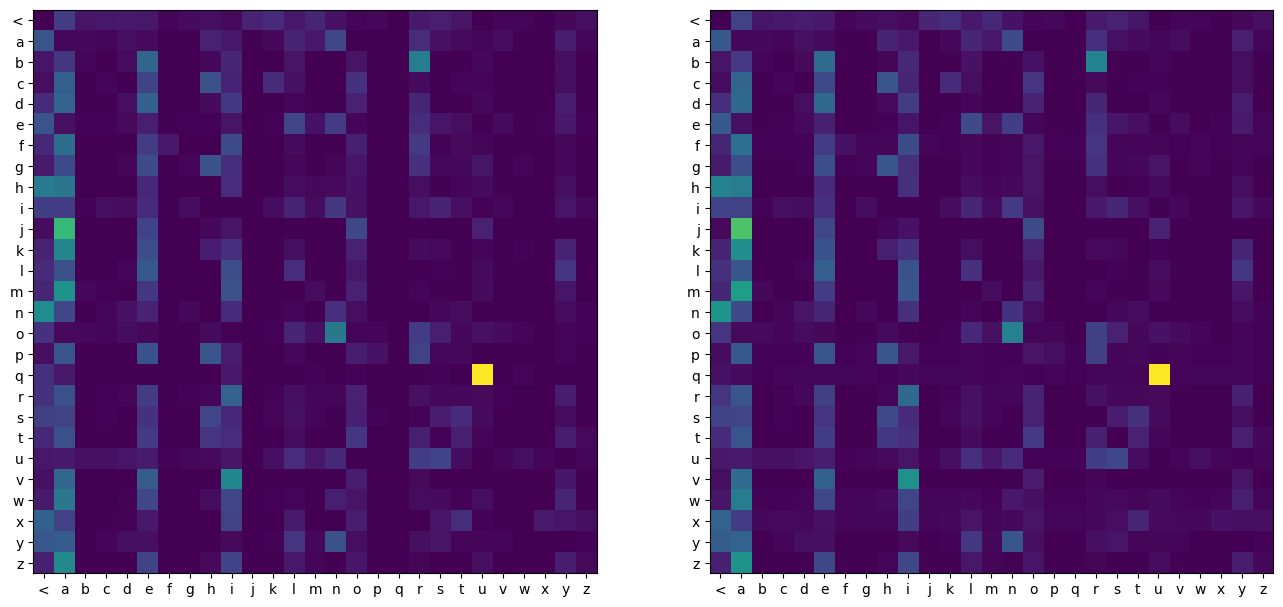

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes[0]
ax.imshow(bigram_norm)
ax.set_xticks(range(len(chars)))
ax.set_yticks(range(len(chars)))
ax.set_xticklabels(chars)
ax.set_yticklabels(chars)

ax = axes[1]
ax.imshow(P)
ax.set_xticks(range(len(chars)))
ax.set_yticks(range(len(chars)))
ax.set_xticklabels(chars)
ax.set_yticklabels(chars)
plt.show()

In [52]:
n_samples = 10
generator = torch.Generator().manual_seed(42)
output = []
for _ in range(n_samples):
    idx = 0
    new_name = chars[idx]
    while (idx != 0) | (len(new_name) == 1):
        idx = torch.multinomial(P[idx, :], num_samples=1, generator=generator).item()
        new_name += chars[idx]
    output.append(new_name[1:-1])
print(output)

['ya', 'syahavilin', 'dleekahmangonya', 'tryahe', 'chen', 'ena', 'da', 'amiiae', 'a', 'keles']
